In [2]:
# Importar librerias para proposito general.

import numpy as np
import matplotlib.pyplot as plt
## LIBRERIA PARA HISTOGRAMA 
import seaborn as sns 
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift
from lcapy import Circuit, j, omega, s
from numpy import logspace
import sympy as sym
from scipy.signal import lti 
from scipy.stats import expon
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

### LIBRERIA PARA MANEJO DE DATOS #################
from sklearn.model_selection import train_test_split


import tensorflow as tf

### IMPORTAMOS LA CAPA DENSA Y DROPOUT PARA EVITAR EL OVERFITTING
from keras.layers import Dropout,Dense,BatchNormalization 

## IMPORTAMOS LOS CALLBACKS PARA OBTENER LOS MEJORESRENDIMIENTOS DE APRENDIZAJE Y NO DESGASTAR EL SISTEMA.
from keras.callbacks import ModelCheckpoint,EarlyStopping 

## IMPORTAMOS LOS OPTIMIZADORES Y REGULARIZERS PARA EVITAR EL OVERFITTING.
from keras import models,optimizers,regularizers 

## PARA LAS CAPAS DENSAS
from keras.models import Sequential 

In [3]:
class KDE():

   """ 
  class in charge of managing the estimation by the non-parametric kernel method

  PARAMETERS
  -------------------------------------------------------------------
  X_function{np.array}--array with the information of the function to which 
                        we need to find its respective distribution function
  H{float}-- bandwidth

  Returns
  -----------------------------------------------------------------------
  None

   """
   def __init__(self,X_function:np.array, H:float=0.5):
     self.X_function=X_function
     self.H=H

   def Gaussian(self):

      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE GAUSSIAN

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None

      """
      self.kernel="gaussian"
      self.__fit()
   def Tophat(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE Tophat

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="tophat"
      self.__fit()
   def epanechnikov(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EPANECHNIKOV

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="epanechnikov"
      self.__fit()
   def exponential(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EXPONENTIAL

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="exponential"
      self.__fit()
   def linear(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE LINEAR

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="linear"
      self.__fit()
   def cosine(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE COSINE

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="cosine"
      self.__fit()
   def __fit(self):
      """
      FUNCTION THAT MAKE THE KERNEL ESTIMATION WITH A FIT ASOCIATE TO THE TYPE OF 
      THE KERNEL FUNCTION {SELF.KERNEL} AND THE DATA{SELF.X_FUNCTION}

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernelDensity=KernelDensity(kernel=self.kernel,bandwidth=self.H).fit(self.X_function.reshape(-1,1))
   def plot(self,X_plot:np.array,figure_size:tuple=(5,5)):
     """
      FUNCTION THAT COMPARE WITH A PLOT THE KERNEL ESTIMATION WITH THE HISTOGRAM
      OF THE SIGNAL.

      PARAMETERS
      -------------------------
      X_plot{np.array}--ARRAY WITH THE X-AXIS DID IT WITH NP.ARANGE(X_MIN,X_MAX,ESPACE)
      FIGURE_SIZE{TUPLE}: WITH THE SIZE OF THE GRAPHICS.

      RETURNS
      ----------------------------------
      None
      
     """

     try:
      X_plot=X_plot[:,np.newaxis]
      log_dens=self.kernelDensity.score_samples(X_plot)
      fig,ax=plt.subplots(figsize=figure_size)
      ax.plot(
          X_plot[:,0],np.exp(log_dens),color="navy",label="Kernel"
      )
      
      ax.hist(self.X_function,density = True)
      plt.show()
     except AttributeError:
       print("YOU NEED TO DECIDE A TYPE OF KERNEL BEFORE....")

In [4]:
# Funciones generales

def fftp(t, senal, x,y=None):
    """ 
    graficar la transformada de fourier y la funcion en el tiempo
    parametros:
    x -> intervalo simetrico para graficar en el dominio de la frecuencia
    """
    #obtener transformada de fourier centrada en cero
    ft = fftshift(fft(senal))
    # obtener el vector de frecuencias del mismo tamaño del vector de tiempo
    w = fftshift(fftfreq(ft.shape[0],t[1],-t[0]))
    mag = np.sqrt((ft.real**2)+(ft.imag**2))
    phase = np.arctan(ft.imag/ft.real)
    
    
    # time plot
    plt.figure(figsize=(14,12))   #Tamaño de la imagen de la gráfica
    plt.subplot(511) 
    plt.title('x(t)')
    plt.plot(t, senal)
    plt.grid()
    
    
    # grafica de la parte imaginaria de la transformada de Fourier:
    plt.figure(figsize=(14,12))
    plt.subplot(512)  #Tengo 5 gráficas (Esta está en la columna 1, fila 2) 
    plt.title('Im{TF}')
    plt.plot(w, ft.imag)
    plt.grid()
    if y!=None:
       plt.ylim(-y,y)
    plt.xlim(-x,x)
    
    # grafica d ela parte real de la transformada de fourier
    plt.figure(figsize=(14,12))
    plt.subplot(513)  #Tengo 4 gráficas (Esta está en la columna 1, fila 2) 
    plt.title('Re{TF}')
    plt.plot(w, ft.real)
    plt.grid()
    if y!=None:
       plt.ylim(-y,y)
    plt.xlim(-x,x)
    
    #grafica de la magnitud  de la transformada de fourier
    plt.subplot(514)
    plt.plot(w,mag)
    plt.title('|FT|')
    plt.grid()
    if y!=None:
       plt.ylim(-y,y)
    plt.xlim(-x,x)
    
    # grafica de la fase de la transformada de Fourier
    plt.subplot(515)
    plt.plot(w,phase,'-',color='orange') #Grafica continua
    plt.stem(w,phase) #Grafica discreta
    plt.title('Phase')
    plt.grid()
    if y!=None:
       plt.ylim(-y,y)
    plt.xlim(-x,x)
    plt.xlabel('Frequency [Hz]')
    
    
    
def Ploteo_tiempo_frecuencia2(tiempo,Funcion_tiempo,xmax=None,ymax=None):
    # La frequencia de muestreo la extraigo del vector del tiempo
    Frecuencia_muestreo= tiempo[1] - tiempo[0]
    Y = fftshift(fft(Funcion_tiempo))  
    W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño adecuado 
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, Y, color='C1')  # grafica el contorno
    plt.title('Representación en Frecuencia')    
    plt.grid(True)
    if xmax!=None: 
          plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(-ymax,ymax)
    plt.xlabel('Frequencia [KHz]')
    plt.ylabel('Amplitud')
    
    

    

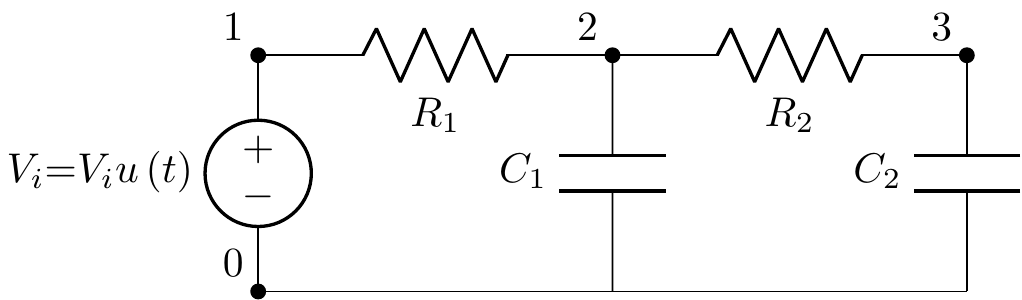

In [5]:
cct = Circuit(
    """
    Vi 1 0 step; down
    R1 1 2; right=1.5
    R2 2 3; right=1.5
    
    C2 3 0_2; down
    C1 2 0_1; down
    W 0 0_1; right
    W 0_1 0_2; right
    """
)


cct.draw()

In [8]:
### OBSERVAMOS LAS CARACTERISTICAS DE NUESTRO CIRCUITO (FUNCIÓN DE TRANSFERENCIA Y RESPUESTA AL IMPULSO)

H=(cct.C2.V(s))/(cct.Vi.V(s))
H.simplify()

                      1                       
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1